A1)
    Let us consider the entire algorithm to be one single event $C_3$. The given algorithm only gives output 0 and 1 hence it is going to be a Bernoulli Distribution.
    $C_3$ consists of two sub-events $C_1 \sim Bern(\frac{c_y}{c_y+c_x})$ and $C_2 \sim Bern(p_y)$ when $C_1$ returns 1 or $C_2 \sim Bern(p_x)$ when $C_1$ returns 0.

We can take cases where the generator will give output = 1. 
The generator will give output 1 when:<br>Case 1) $C_1 = 1$ and $C_2 = 1$, <br> Case 2) $C_1 = 1$ and $C_2 = 0$ or $C_1 = 0$ and $C_2 = 0$ and then Case 1, <br>Case 3) $C_1 = 1$ and $C_2 = 0$ or $C_1 = 0$ and $C_2 = 0$ and then Case 2 and so on...

Let $a_0 = \frac{p_y.c_y}{c_y+c_x}$
<br>$P(X = 1) = a_0 + a_0 . \big(\frac{c_y.(1-p_y)}{c_y + c_x} + \frac{c_x.(1-p_x)}{c_x+c_y}\big) + a_0 . \big(\frac{c_y.(1-p_y)}{c_y + c_x} + \frac{c_x.(1-p_x)}{c_x+c_y}\big)^{2} + ... \infty$

We can now use the formula for infinite GP.<br>
$S_\infty=\frac{a}{1-r}$
<br>
$P(X = 1) = \frac{\frac{c_y.p_y}{c_y+c_x}}{1 - \frac{c_y - c_y.p_y + c_x - c_x.p_x}{c_y+c_x}}$
<br>
On solving we get,<br>
$P(X = 1) = \frac{c_y.p_y}{c_y.p_y+c_x.p_x}$
<br><br>
Hence we can conclude,
<br>
$C_3 \sim Bern(\frac{c_y.p_y}{c_y.p_y+c_x.p_x}) $

Now we need to find the number of iterations required for $C_3$ to give output 1.<br>
In other words we need to find the number of trials until first success. Clearly, it is a geometric distribution. So,
Number of Iterations $\sim Geom(\frac{c_y.p_y}{c_y.p_y + c_x.p_x})$

A2)

In [29]:
using Distributions
using Statistics
using Plots
using StatsPlots

┌ Info: Precompiling StatsPlots [f3b207a7-027a-5e70-b257-86293d7955fd]
└ @ Base loading.jl:1423
┌ Warning: Module Plots with build ID 36244145644401 is missing from the cache.
│ This may mean Plots [91a5bcdd-55d7-5caf-9e0b-520d859cae80] does not support precompilation but is imported by a module that does.
└ @ Base loading.jl:1107
┌ Info: Skipping precompilation since __precompile__(false). Importing StatsPlots [f3b207a7-027a-5e70-b257-86293d7955fd].
└ @ Base loading.jl:1124


In [5]:
p = 2

2

In [6]:
function proposal()
    U = zeros(p)
    matrix = zeros(2,p)
    accept = 0
    count = 0
    while accept == 0
        sum_of_squares = 0
        count = count + 1
        for i in 1:p
            U[i] = rand(Uniform(-1,1))
            sum_of_squares = U[i]^2 + sum_of_squares
        end
        if sum_of_squares < 1
            accept = 1
            for j in 1:p
                matrix[1,j] = U[j]
            end
            matrix[2,1] = count
        end
    end
    return matrix
end

proposal (generic function with 1 method)

In [7]:
n = 10000
samp = zeros(n,p)
counts = zeros(n)
for i in 1:n
    matrix = proposal()
    for j in 1:p
        samp[i,j] = matrix[1,j]
    end
    counts[i] = matrix[2,1]
end

In [8]:
Statistics.mean(counts)

1.2644

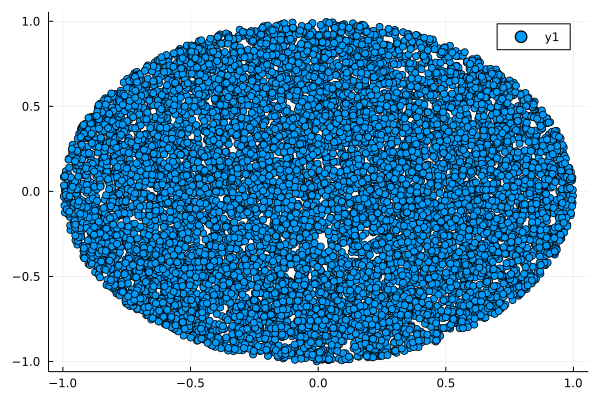

In [9]:
scatter(samp[:,1],samp[:,2])

As p increases the accuracy of the mean decreases and hence we will need to increase the number of iterations

<br>A3)


In this question it is enough to evaluate if the random value generated lies between $-a$ and $a$.

In [22]:
function RandomNormal(a)
    flag = 0
    while flag == 0
        u = rand(Normal(0,1))
        if u<a && u>-a
            flag = 1
            return u
        end
    end
end

RandomNormal (generic function with 1 method)

In [23]:
n = 10000
Normal_values = zeros(n)
for i in 1:n
    Normal_values[i]=RandomNormal(4)
end


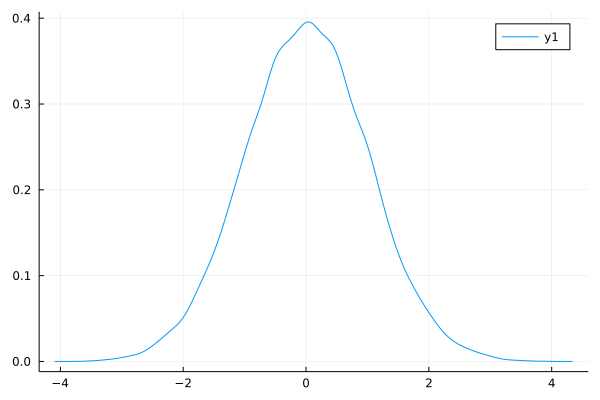

In [32]:
density(Normal_values)

In [33]:
std(Normal_values)

0.9968256491854675

In [34]:
mean(Normal_values)

0.012960859731307766

For a = 1

In [35]:
n = 10000
Normal_values = zeros(n)
for i in 1:n
    Normal_values[i]=RandomNormal(1)
end

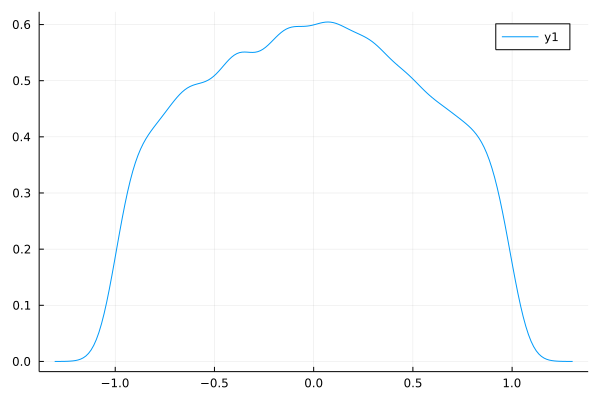

In [36]:
density(Normal_values)

In [37]:
std(Normal_values)

0.5348198183156575

In [38]:
mean(Normal_values)

-0.005751700458298175